Train a model on our prepared data and features
In this notebook, we take the features generated and train different ML models on it to assess the predictiveness of the features and eventually create a good model.

In [1]:
import pandas as pd
import dill
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
df_xunprocessed = dill.load(open('./data/NYC-features.dill','rb'))
df_unprocessed = dill.load(open('./data/NYC-finalfeatures.dill','rb'))
df_reviews = dill.load(open('./data/NYC-google-reviews1.dill','rb'))

In [3]:
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',100)
print(df_xunprocessed)

                  business_id                            categories  \
0      RDE8pT0YZbz4BsO_sPKbcg             [cafes, coffee, catering]   
1      8G6H30Krmj8-OHs6hZfT1g  [newamerican, southern, comfortfood]   
2      g_Zz87qghqq9bKHiKyws0w    [tradamerican, speakeasies, latin]   
3      6AC4yhUdnh64zE6b5-n6OQ                         [newamerican]   
4      W_0AX5JL3QZnX1oQNxQGtw                             [mexican]   
...                       ...                                   ...   
16512  b5Q8zMcliyrVFRtRr-WGWQ                             [chinese]   
16513  igIqe453-RLHGq_1hp4Ngg               [mexican, delis, salad]   
16514  WtMY7hHllFXZHk_ttqy_8Q                 [sandwiches, hotdogs]   
16515  smfjfhYBJ7sH3OVwQE5Brg                          [foodstands]   
16516  VEHOiqyXrzNPgHYbcDsNJw                           [cafeteria]   

              city  user_ratings_total  coordinates.latitude  \
0      South Bronx                 108             40.810086   
1         New York 

Let's take a look at our dataframe created by merging the old and new datasets and creating the new feature

In [4]:
df_xunprocessed.head()

,business_id,categories,city,user_ratings_total,coordinates.latitude,coordinates.longitude,name,display_phone,location.display_address,location.state,location.zipcode,is_closed,rating,review_count,price,transcations,url,std_of_stars,median_of_stars,stars_linear_coef,transactions_value
0,RDE8pT0YZbz4BsO_sPKbcg,"[cafes, coffee, catering]",South Bronx,108,40.810086,-73.921687,Mottley Kitchen,(929) 308-2099,"[402 E 140th St, South Bronx, NY 10454]",NY,10454,False,4.5,63,2,"[pickup, delivery]",https://www.yelp.com/biz/mottley-kitchen-south...,0.000000,5.0,-0.000000,2.0
1,8G6H30Krmj8-OHs6hZfT1g,"[newamerican, southern, comfortfood]",New York,79,40.817300,-73.941710,Belle Harlem,(347) 819-4076,"[2363 Adam Clayton Powell Blvd, New York, NY 1...",NY,10030,False,4.5,120,3,[],https://www.yelp.com/biz/belle-harlem-new-york...,0.000000,5.0,-0.000000,0.0
2,g_Zz87qghqq9bKHiKyws0w,"[tradamerican, speakeasies, latin]",Bronx,226,40.807370,-73.927520,Beatstro,(718) 489-9397,"[135 Alexander Ave, Bronx, NY 10454]",NY,10454,False,4.0,151,2,"[pickup, restaurant_reservation, delivery]",https://www.yelp.com/biz/beatstro-bronx?adjust...,0.979796,5.0,0.063633,3.0
3,6AC4yhUdnh64zE6b5-n6OQ,[newamerican],New York,162,40.813340,-73.944670,Renaissance Harlem,(646) 838-7604,"[2245 Adam Clayton Powell, New York, NY 10027]",NY,10027,False,4.0,144,2,"[restaurant_reservation, pickup, delivery]",https://www.yelp.com/biz/renaissance-harlem-ne...,0.000000,5.0,0.000000,3.0
4,W_0AX5JL3QZnX1oQNxQGtw,[mexican],Bronx,350,40.818565,-73.916828,Xochimilco Family Restaurant,(718) 402-5400,"[653 Melrose Ave, Bronx, NY 10455]",NY,10455,False,4.5,76,2,[],https://www.yelp.com/biz/xochimilco-family-res...,1.600000,5.0,-0.029553,0.0


In [5]:
df_xunprocessed[['coordinates.latitude','coordinates.longitude','rating']].head()
X=list(df_xunprocessed['coordinates.longitude'])
Y=list(df_xunprocessed['coordinates.latitude'])
Z=list(df_xunprocessed['rating'])
print(max(X))

73.850772


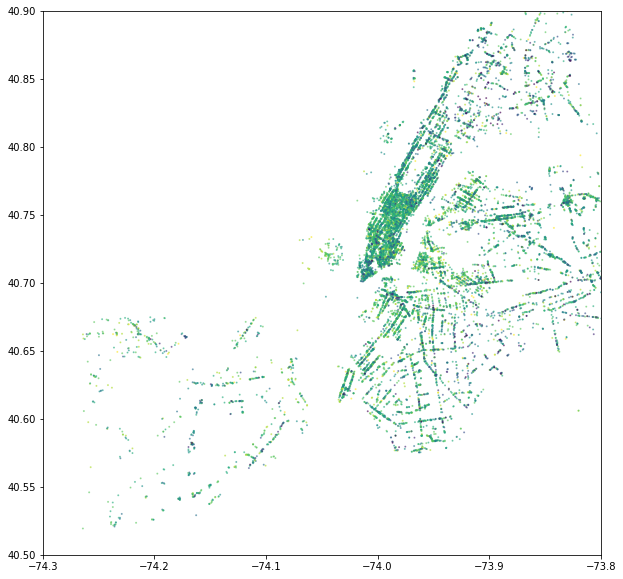

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X, Y, s=1, c=Z, alpha=0.5)
plt.xlim(-74.3,-73.8)
plt.ylim(40.5,40.9)
plt.show()

In [7]:
df_reviews.head()

,business_id,text,user_id,relative_time_description,time_created,user_rating
0,RDE8pT0YZbz4BsO_sPKbcg,Great place for lunch! Pleasant atmosphere. Am...,Daniel Donnelly,2 months ago,2019-02-26 02:49:43,5
1,RDE8pT0YZbz4BsO_sPKbcg,It’s an amazing little coffee shop. The food ...,Valentina Hernandez,2 weeks ago,2019-04-11 19:31:10,5
2,RDE8pT0YZbz4BsO_sPKbcg,"Awesome coffee, delicious pastries, and an inc...",Patrick Hart,2 months ago,2019-02-19 17:40:37,5
3,RDE8pT0YZbz4BsO_sPKbcg,Gem in the Bronx! Their food and drinks are am...,Ange Mallonga,2 weeks ago,2019-04-15 17:20:13,5
4,RDE8pT0YZbz4BsO_sPKbcg,This place says “gentrification” all over it. ...,Nick Mennell,5 months ago,2018-11-29 15:50:10,5


In [8]:
Cust = []
for i in df_reviews['user_rating']:
    if (i == 1) | (i==2):
        Cust.append('BAD')
    elif (i == 3):
        Cust.append('NEUTRAL')
    else:
        Cust.append('GOOD')
        

df_reviews['Customer EXP'] = Cust
df_reviews['Customer EXP'].value_counts()
df_reviews['Text length'] = df_reviews['text'].apply(lambda x:len(x.split()))
df_reviews.head(100)

,business_id,text,user_id,relative_time_description,time_created,user_rating,Customer EXP,Text length
0,RDE8pT0YZbz4BsO_sPKbcg,Great place for lunch! Pleasant atmosphere. Am...,Daniel Donnelly,2 months ago,2019-02-26 02:49:43,5,GOOD,53
1,RDE8pT0YZbz4BsO_sPKbcg,It’s an amazing little coffee shop. The food ...,Valentina Hernandez,2 weeks ago,2019-04-11 19:31:10,5,GOOD,60
2,RDE8pT0YZbz4BsO_sPKbcg,"Awesome coffee, delicious pastries, and an inc...",Patrick Hart,2 months ago,2019-02-19 17:40:37,5,GOOD,35
3,RDE8pT0YZbz4BsO_sPKbcg,Gem in the Bronx! Their food and drinks are am...,Ange Mallonga,2 weeks ago,2019-04-15 17:20:13,5,GOOD,24
4,RDE8pT0YZbz4BsO_sPKbcg,This place says “gentrification” all over it. ...,Nick Mennell,5 months ago,2018-11-29 15:50:10,5,GOOD,51
...,...,...,...,...,...,...,...,...
95,H4fS32597GN025rMM85W-g,I'm very conflicted about this place. The food...,Khalil Raja,a month ago,2019-03-14 20:58:04,3,NEUTRAL,53
96,H4fS32597GN025rMM85W-g,"Visiting with a friend, and she read good revi...",Jacco van Koll,2 months ago,2019-02-10 08:38:56,5,GOOD,74
97,H4fS32597GN025rMM85W-g,Waited forever. They gave us a seat and made u...,Alexa Lawson,a week ago,2019-04-22 23:13:33,1,BAD,93
98,H4fS32597GN025rMM85W-g,Horrible customer service. Waited about 5 minu...,Tiffany MeiLin,in the last week,2019-04-26 19:33:57,1,BAD,123


In [9]:
df_unprocessed.columns

Index(['business_id', 'categories', 'city', 'user_ratings_total',
       'coordinates.latitude', 'coordinates.longitude', 'name',
       'display_phone', 'location.display_address', 'location.state',
       'location.zipcode', 'is_closed', 'rating', 'review_count', 'price',
       'transcations', 'url', 'restaurant_density',
       'restaurant_similar_density', 'zprice_all', 'zreview_count_all',
       'zstar_all', 'is_chain', 'relative_user_ratings_total'],
      dtype='object')

No handles with labels found to put in legend.


Text(0,0.5,'Total Number of Restaurants')

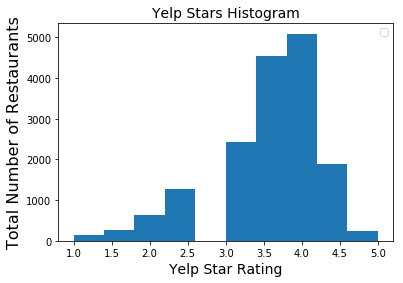

In [10]:
plt.hist([df_unprocessed['rating'].values])


plt.legend()
plt.title('Yelp Stars Histogram',fontsize=14)
plt.xlabel('Yelp Star Rating',fontsize=14)
plt.ylabel('Total Number of Restaurants',fontsize=16)

In [11]:
df_xunprocessed.columns



Index(['business_id', 'categories', 'city', 'user_ratings_total',
       'coordinates.latitude', 'coordinates.longitude', 'name',
       'display_phone', 'location.display_address', 'location.state',
       'location.zipcode', 'is_closed', 'rating', 'review_count', 'price',
       'transcations', 'url', 'std_of_stars', 'median_of_stars',
       'stars_linear_coef', 'transactions_value'],
      dtype='object')

In [12]:
df_ml_x = pd.merge(df_xunprocessed, df_unprocessed, on='business_id')

In [13]:
df_ml_x.head()
df_ml_randomized = df_ml_x.reindex(np.random.permutation(df_ml_x.index))

In [14]:
df_ml_randomized.columns

Index(['business_id', 'categories_x', 'city_x', 'user_ratings_total_x',
       'coordinates.latitude_x', 'coordinates.longitude_x', 'name_x',
       'display_phone_x', 'location.display_address_x', 'location.state_x',
       'location.zipcode_x', 'is_closed_x', 'rating_x', 'review_count_x',
       'price_x', 'transcations_x', 'url_x', 'std_of_stars', 'median_of_stars',
       'stars_linear_coef', 'transactions_value', 'categories_y', 'city_y',
       'user_ratings_total_y', 'coordinates.latitude_y',
       'coordinates.longitude_y', 'name_y', 'display_phone_y',
       'location.display_address_y', 'location.state_y', 'location.zipcode_y',
       'is_closed_y', 'rating_y', 'review_count_y', 'price_y',
       'transcations_y', 'url_y', 'restaurant_density',
       'restaurant_similar_density', 'zprice_all', 'zreview_count_all',
       'zstar_all', 'is_chain', 'relative_user_ratings_total'],
      dtype='object')

In [15]:
import numpy as np
df_ml = df_ml_randomized[['review_count_x','rating_x','price_x','std_of_stars',\
                        'median_of_stars','stars_linear_coef','restaurant_density',\
                        'restaurant_similar_density','zreview_count_all','zstar_all','zprice_all',\
                        'is_chain','is_closed_x','transactions_value','user_ratings_total_x','relative_user_ratings_total']]

df_ml.dropna(inplace=True)

/opt/conda/envs/data3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
df_ml_features = df_ml
df_ml_features.columns

Index(['review_count_x', 'rating_x', 'price_x', 'std_of_stars',
       'median_of_stars', 'stars_linear_coef', 'restaurant_density',
       'restaurant_similar_density', 'zreview_count_all', 'zstar_all',
       'zprice_all', 'is_chain', 'is_closed_x', 'transactions_value',
       'user_ratings_total_x', 'relative_user_ratings_total'],
      dtype='object')

In [17]:
# Split in features and target
#df_ml_features.drop(df.columns[[0,1,3]]'rating_x', axis=1, inplace=True)
df_ml_target = df_ml['rating_x']
df_ml_features.drop('rating_x', axis=1, inplace=True)

/opt/conda/envs/data3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
df_ml_features.columns
df_ml_features.head()

,review_count_x,price_x,std_of_stars,median_of_stars,stars_linear_coef,restaurant_density,restaurant_similar_density,zreview_count_all,zstar_all,zprice_all,is_chain,is_closed_x,transactions_value,user_ratings_total_x,relative_user_ratings_total
15902,129,1,1.469694,4.0,0.037524,1638.0,106.0,-0.378163,-0.131074,-0.220238,False,False,2.0,123,400.113208
2301,33,3,0.400000,5.0,-0.004740,84.0,13.0,-0.188859,0.136905,0.339286,False,False,0.0,70,182.846154
11911,321,2,0.400000,5.0,-0.014655,1564.0,365.0,0.013195,-0.030691,0.013427,True,False,2.0,815,562.087671
456,2199,2,0.489898,5.0,0.012514,1187.0,23.0,3.435956,0.063606,-0.003370,False,False,0.0,2336,569.086957
2665,175,2,0.800000,5.0,0.016280,641.0,33.0,-0.064738,0.079407,0.069813,False,False,2.0,150,153.848485


In [19]:
# Try different Regression techniques
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

clf = LinearRegression()
clf_B = DecisionTreeRegressor(random_state=1,max_depth=9)
clf_C = GradientBoostingRegressor(random_state=1)
clf_D = RandomForestRegressor(random_state=1)

In [20]:
#df_ml_features.dropna(inplace=True)

print(len(df_ml_features))
print(len(df_ml_target))
for index,row in df_ml_features.iterrows():
    if '£'== row['price_x'] or '££'== row['price_x']:
        df_ml_features.drop(index,inplace=True)
        df_ml_target.drop(index,inplace=True)
        print(len(df_ml_features))
        print(len(df_ml_target))
        
X_train, X_test, y_train, y_test = train_test_split(df_ml_features, df_ml_target, test_size = 0.2, random_state = 10,\
                                                    stratify = df_ml_target)

16420
16420


Mean Absolute Error: 0.04722898903775882
Mean Squared Error: 0.01756394640682095
R^2: 0.967601972176806
Feature ranking:
       review_count_x price_x  std_of_stars  median_of_stars  \
1305                6       2      1.469694              5.0   
13177             121       2      1.600000              5.0   
6813              350       1      0.489898              5.0   
4852                9       1      1.833030              4.0   
4971                3       1      0.400000              5.0   

       stars_linear_coef  restaurant_density  restaurant_similar_density  \
1305            0.005910                73.0                         2.0   
13177          -0.003004               440.0                        31.0   
6813           -0.007383               646.0                        31.0   
4852            0.006393               213.0                        25.0   
4971           -0.005345               154.0                        16.0   

       zreview_count_all  zstar_all  

(-1, 15)

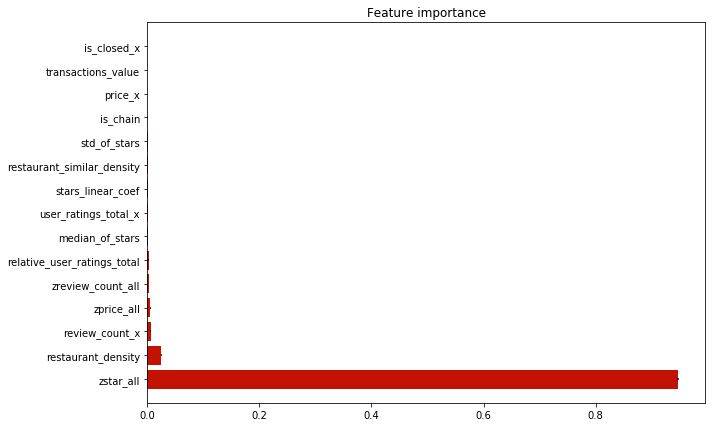

In [21]:
from sklearn import metrics

clf_D.fit(X_train,list(y_train.values))
y_pred_D = clf_D.predict(X_test)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test.values, y_pred_D))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_D))
print("R^2:", metrics.r2_score(y_test, y_pred_D))

importances = clf_D.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_D.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

print(X_test.head())
for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:,indices[f]].name, importances[indices[f]]))
    #print("%d. feature: %s (%f)" % (f + 1, df_ml_features.columns[indices[f]], importances[indices[f]]))

plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importances[indices],
       color="#c41200", xerr=std[indices], align="center")
plt.yticks(range(X_test.shape[1]), df_ml_features.iloc[:,indices].columns)
#plt.yticks(range(X_test.shape[1]), list(X_test))
plt.ylim([-1, X_test.shape[1]])



Best alpha using built-in LassoCV: 0.068731
Best score using built-in LassoCV: 0.478673
Lasso picked 7 variables and eliminated the other 8 variables


Text(0.5,1,'Feature importance using Lasso Model')

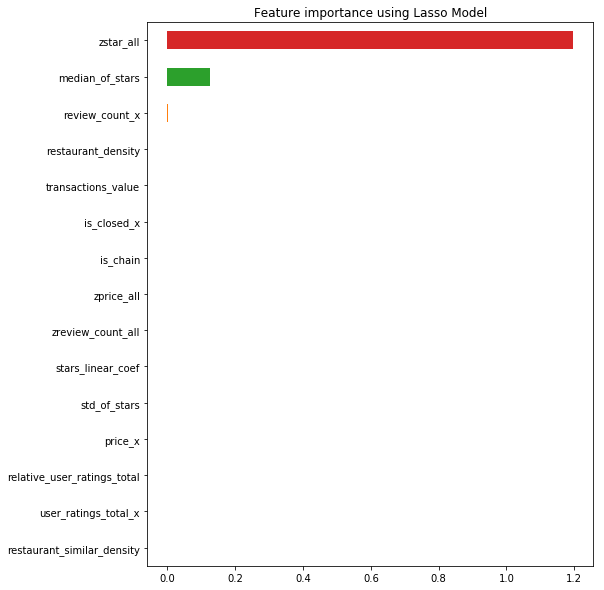

In [22]:
from sklearn.linear_model import LassoCV
#X_train.drop('rating_x', axis=1, inplace=True)
#X_test.drop('rating_x', axis=1, inplace=True)
#X_train.drop('zstar_all', axis=1, inplace=True)
#X_test.drop('zstar_all', axis=1, inplace=True)
#X_train.drop('median_of_stars', axis=1, inplace=True)
#X_test.drop('median_of_stars', axis=1, inplace=True)
dar= X_train
reg = LassoCV()
reg.fit(dar, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(dar,y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Mean Absolute Error: 0.11649172507947533
Mean Squared Error: 0.03140799620191334
R^2: 0.9420655750563441
Linear picked 7 variables and eliminated the other 8 variables


Text(0.5,1,'Feature importance using Linear Model')

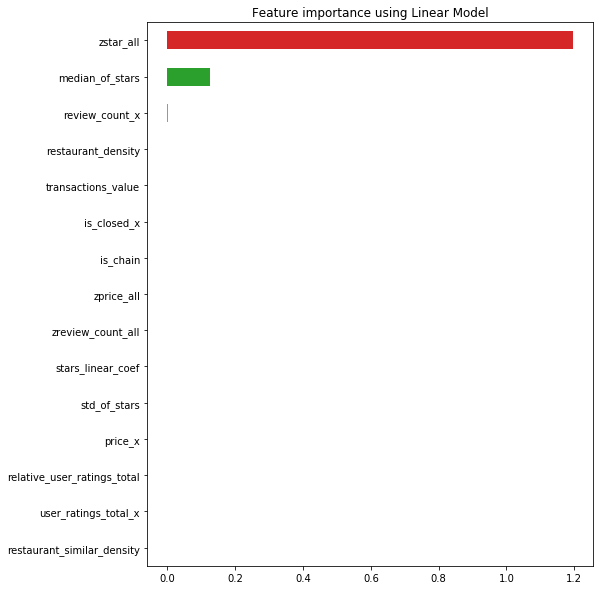

In [23]:
clf.fit(X_train,list(y_train.values))
y_pred = clf.predict(X_test)

from sklearn import metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test.values, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("R^2:", metrics.r2_score(y_test, y_pred))
coef = pd.Series(reg.coef_, index = X_train.columns)
print("Linear picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Model")

Mean Absolute Error: 0.04844089952380333
Mean Squared Error: 0.02436889466278629
R^2: 0.9550497303385741
Feature ranking:
       review_count_x price_x  std_of_stars  median_of_stars  \
1305                6       2      1.469694              5.0   
13177             121       2      1.600000              5.0   
6813              350       1      0.489898              5.0   
4852                9       1      1.833030              4.0   
4971                3       1      0.400000              5.0   

       stars_linear_coef  restaurant_density  restaurant_similar_density  \
1305            0.005910                73.0                         2.0   
13177          -0.003004               440.0                        31.0   
6813           -0.007383               646.0                        31.0   
4852            0.006393               213.0                        25.0   
4971           -0.005345               154.0                        16.0   

       zreview_count_all  zstar_all 

(-1, 15)

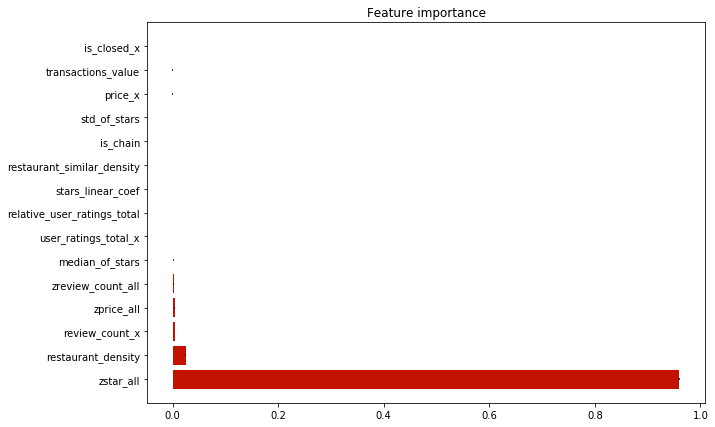

In [24]:
from sklearn import metrics

clf_B.fit(X_train,list(y_train.values))
y_pred_B = clf_B.predict(X_test)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test.values, y_pred_B))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_B))
print("R^2:", metrics.r2_score(y_test, y_pred_B))

importances = clf_B.feature_importances_
#std = np.std([tree.feature_importances_ for tree in clf_B.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

print(X_test.head())
for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:,indices[f]].name, importances[indices[f]]))
    #print("%d. feature: %s (%f)" % (f + 1, df_ml_features.columns[indices[f]], importances[indices[f]]))

plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importances[indices],
       color="#c41200", xerr=std[indices], align="center")
plt.yticks(range(X_test.shape[1]), df_ml_features.iloc[:,indices].columns)
#plt.yticks(range(X_test.shape[1]), list(X_test))
plt.ylim([-1, X_test.shape[1]])



[3.57364018 3.52245847 3.54293619 ... 3.53520804 2.4219969  4.48078109]
Mean Absolute Error: 0.0810452175908111
Mean Squared Error: 0.020782400312249892
R^2: 0.9616652904789353
[0.08947631 0.01623738 0.00963496 0.03353707 0.00593759 0.22785888
 0.01195452 0.05275235 0.36196552 0.12658532 0.01232771 0.
 0.         0.00547571 0.04625668]
Feature ranking:
       review_count_x price_x  std_of_stars  median_of_stars  \
1305                6       2      1.469694              5.0   
13177             121       2      1.600000              5.0   
6813              350       1      0.489898              5.0   
4852                9       1      1.833030              4.0   
4971                3       1      0.400000              5.0   

       stars_linear_coef  restaurant_density  restaurant_similar_density  \
1305            0.005910                73.0                         2.0   
13177          -0.003004               440.0                        31.0   
6813           -0.007383        

(-1, 15)

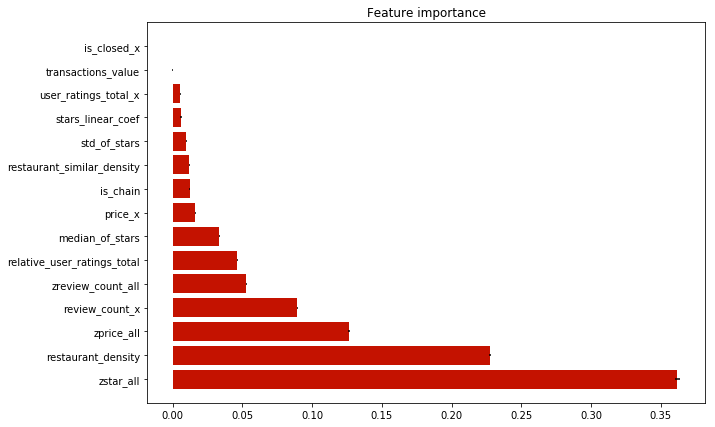

In [28]:
clf_C.fit(X_train,list(y_train.values))
y_pred_C = clf_C.predict(X_test)
print(y_pred_C)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test.values, y_pred_C))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_C))
print("R^2:", metrics.r2_score(y_test, y_pred_C))
importances = clf_C.feature_importances_
print(importances)
#print([tree.feature_importances_ for tree in clf_C.estimators_])
#std = np.std([tree.feature_importances_ for tree in clf_C.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

print(X_test.head())
for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:,indices[f]].name, importances[indices[f]]))
    #print("%d. feature: %s (%f)" % (f + 1, df_ml_features.columns[indices[f]], importances[indices[f]]))

plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importances[indices],
       color="#c41200", xerr=std[indices], align="center")
plt.yticks(range(X_test.shape[1]), df_ml_features.iloc[:,indices].columns)
#plt.yticks(range(X_test.shape[1]), list(X_test))
plt.ylim([-1, X_test.shape[1]])


In [26]:
from sklearn import model_selection
cv_test_errors = []

# The K-fold Cross Validation algorithm has a bug (feature?) where it makes the
# folds consecutive elements.  Because the input data is presorted along X, we have
# to first shuffle the input data.  (Exercise: What happens if we don't?
est = clf_C
    
    # Note that cross_val_score performs K-fold Cross Validation but returns a score,
    # which is the negative of the error.
cv_test_error = -model_selection.cross_val_score(
    est,
    df_ml_features,
    df_ml_target,
    cv=10,  # Number of folds
    scoring='neg_mean_squared_error'
)
cv_test_errors.append(cv_test_error.mean())
print(cv_test_error, cv_test_errors)
#plt.plot(max_depths, in_sample_errors, label='In-Sample Error')
#plt.plot(max_depths, test_errors, label='Out-of-Sample Error')
#plt.plot(max_depths, cv_test_errors, label='Cross-Validation Error')
#plt.xlabel('max_depth')
#plt.ylabel('MSE')
#plt.legend(loc='upper right');

[0.019094   0.02220992 0.01807476 0.01874561 0.02019666 0.01930992
 0.01924717 0.01991196 0.02114079 0.01780346] [0.01957342568085379]


since the value of error is too low after cv testing there are low chances of bais in the trained model

# Enter the features of the new restaurant

In [39]:
import math
import sys
category_dic = {}
for i, restaurant in df_xunprocessed.iterrows():
    for category in restaurant['categories']:
        try:
            category_dic[category] += [i]
        except:
            category_dic[category] = [i]
            
def distance(ilat,jlat,ilong,jlong):
    R = 6371.e3 # earth radius in m
    phi1 = math.radians(ilat)
    phi2 = math.radians(jlat)
    deltaphi = math.radians(jlat-ilat)
    deltalambda = math.radians(jlong-ilong)
    a = math.sin(deltaphi/2)**2 + math.cos(phi1)*math.cos(phi2) * math.sin(deltalambda/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c / 1609.34 # in miles
    return d
    try:    
            ilong = -73.941710
            ilat = 40.817300
            categories = ['newamerican', 'southern', 'comfortfood']
            price  = 3
            review_count = 50
            rating=3.0 #average (all subway restaurants in Newyork)
            name='Subway'
            price_all_list = []
            review_count_all_list = []
            review_per_week_all_list = []
            star_all_list = []
            density_similar_list = []
            density_all_list = []
            relative_user_ratings_list=0    

            for category in categories:
                for jrestaurant in category_dic[category]:
                    jlong = df_unprocessed.loc[jrestaurant]['coordinates.longitude']
                    jlat = df_unprocessed.loc[jrestaurant]['coordinates.latitude']
                    dist = distance(ilat,jlat,ilong,jlong)
                    # if less than 1 mile (include self)
                    # certain restaurants will be double counted if they belong to the same categories but
                    # that's ok as it adds a weight for very similar restaurants
                    if dist <= 1:
                        density_similar_list += [jrestaurant]
                        jrate = df_unprocessed.loc[jrestaurant]['user_ratings_total']
                        relative_user_ratings_list+=jrate
            restaurant_similar_density = len(density_similar_list)
            relative_user_ratings_total =(relative_user_ratings_list)/len(density_similar_list)


            # Loop over all resturants to calculate the "all" properties
            for j, jrestaurant in df_unprocessed.iterrows():
                jlong = jrestaurant['coordinates.longitude']
                jlat = jrestaurant['coordinates.latitude']
                dist = distance(ilat,jlat,ilong,jlong)
                # if less than 1 mile (include self in calculation of statistics)
                if dist <= 1:
                    price_all_list += [jrestaurant['price']]
                    review_count_all_list += [jrestaurant['review_count']]
                    star_all_list += [jrestaurant['rating']]
                    density_all_list += [j]


            # price and stars are not divided by standard deviation because it is often equal to 0
            zprice_all = (price-np.nanmean(price_all_list))/4.
            #df_unprocessed.loc[i,'relative_user_ratings_total'] = (restaurant['user_ratings_total']-np.nanmean(price_all_list))/4.
            zreview_count_all = (review_count-np.nanmean(review_count_all_list))/np.nanstd(review_count_all_list)
            #df_unprocessed.loc[i,'zreview_per_week_all'] = (restaurant['reviews_per_week']-np.nanmean(review_per_week_all_list))/np.nanstd(review_per_week_all_list)
            zstar_all = (rating-np.nanmean(star_all_list))/5.
            restaurant_density = len(density_all_list)
            #print(len(density_all_list))
            restaurant_similar_density = len(density_similar_list)
            # True if there are more than one
            is_chain = (len(df_unprocessed[name == restaurant['name']]) > 1)
            X_row=['review_count_x', 'price_x', 'std_of_stars', 'median_of_stars',
           'stars_linear_coef', 'restaurant_density', 'restaurant_similar_density',
           'zreview_count_all', 'zstar_all', 'zprice_all', 'is_chain',
           'is_closed_x', 'transactions_value', 'user_ratings_total_x',
           'relative_user_ratings_total']
            pred_star=clf_C.predict(X_row)
    except:
        print(sys.exc_info())
    

In [31]:
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 202, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 12, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

est = clf_D
gs = model_selection.GridSearchCV(
    est,
    random_grid,
    cv=5,  # 5-fold cross validation
    n_jobs=2,  # run each hyperparameter in one of two parallel jobs
    scoring='neg_mean_squared_error'
)
gs.fit(X_train, y_train)
print (gs.best_params_)

plt.plot(X_train, y_train, 'b.', label='data')
line = plt.plot(X_train, gs.predict(X_train), 'r-', label='model')
plt.setp(line, linewidth=3.)
plt.legend(loc='upper right')
plt.show()

{'n_estimators': [200, 202], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 12, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


KeyboardInterrupt: 

In [32]:
importances = clf_D.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_D.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:,indices[f]].name, importances[indices[f]]))
    #print("%d. feature: %s (%f)" % (f + 1, df_ml_features.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature: zstar_all (0.946046)
2. feature: restaurant_density (0.025425)
3. feature: review_count_x (0.006269)
4. feature: zprice_all (0.005752)
5. feature: zreview_count_all (0.003749)
6. feature: relative_user_ratings_total (0.002731)
7. feature: median_of_stars (0.002050)
8. feature: user_ratings_total_x (0.001957)
9. feature: stars_linear_coef (0.001839)
10. feature: restaurant_similar_density (0.001463)
11. feature: std_of_stars (0.001220)
12. feature: is_chain (0.000692)
13. feature: price_x (0.000418)
14. feature: transactions_value (0.000391)
15. feature: is_closed_x (0.000000)


In [33]:
df_ml_features.columns

Index(['review_count_x', 'price_x', 'std_of_stars', 'median_of_stars',
       'stars_linear_coef', 'restaurant_density', 'restaurant_similar_density',
       'zreview_count_all', 'zstar_all', 'zprice_all', 'is_chain',
       'is_closed_x', 'transactions_value', 'user_ratings_total_x',
       'relative_user_ratings_total'],
      dtype='object')

In [34]:
# Labels to be used for feature importance, same order as column labels
labels = ['Review Count', 'Star Rating', 'Price', 'Age', 'Std of Star Rating',\
          'Reviews per Week', 'Median of Star Rating', 'Reaction to Reviews per Week',\
          'Linear Coef of Stars', 'Restaurant Density', 'Similar Restaurant Density',\
          'Relative Review Count', 'Relative Star Rating', 'Relative Price', 'Relative Reviews per Week',\
          'Business Claimed', 'Chain']
len(labels)

17

(-1, 15)

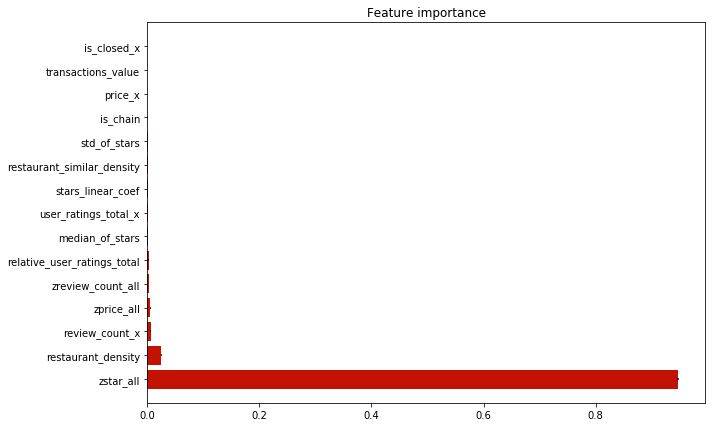

In [36]:
#Random forest
plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importances[indices],
       color="#c41200", xerr=std[indices], align="center")
plt.yticks(range(X_test.shape[1]), df_ml_features.iloc[:,indices].columns)
#plt.yticks(range(X_test.shape[1]), [labels[i] for i in indices])
plt.ylim([-1, X_test.shape[1]])

In [37]:
 #Gradient Boosting importances
importances2 = clf_C.feature_importances_
#std2 = np.std([tree.feature_importances_ for tree in clf_C.estimators_],axis=0)
indices2 = np.argsort(importances2)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, df_ml_features.iloc[:,indices2[f]].name, importances2[indices2[f]]))
    #print("%d. feature: %s (%f)" % (f + 1, df_ml_features.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature: zstar_all (0.361966)
2. feature: restaurant_density (0.227859)
3. feature: zprice_all (0.126585)
4. feature: review_count_x (0.089476)
5. feature: zreview_count_all (0.052752)
6. feature: relative_user_ratings_total (0.046257)
7. feature: median_of_stars (0.033537)
8. feature: price_x (0.016237)
9. feature: is_chain (0.012328)
10. feature: restaurant_similar_density (0.011955)
11. feature: std_of_stars (0.009635)
12. feature: stars_linear_coef (0.005938)
13. feature: user_ratings_total_x (0.005476)
14. feature: transactions_value (0.000000)
15. feature: is_closed_x (0.000000)


(-1, 15)

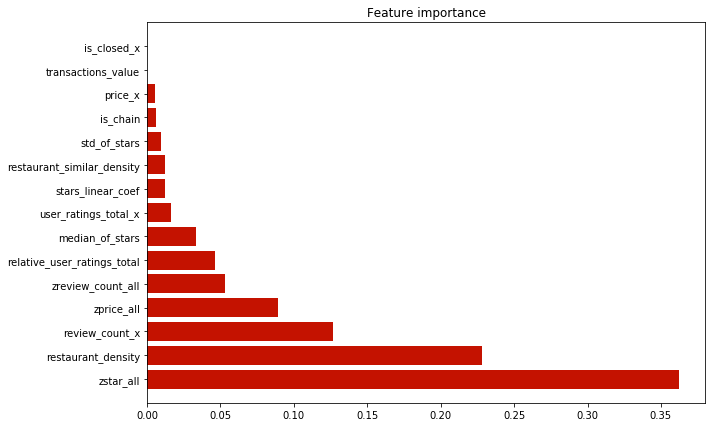

In [38]:
# Gradient boosting
% matplotlib inline
plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(X_test.shape[1]), importances2[indices2],
       color="#c41200", align="center")
plt.yticks(range(X_test.shape[1]), df_ml_features.iloc[:,indices].columns)
#plt.yticks(range(X_test.shape[1]), [labels[i] for i in indices2])
plt.ylim([-1, X_test.shape[1]])

